In [12]:
import os
import numpy as np
import pandas as pd
import itertools
import sklearn.preprocessing
import csv
import ntpath
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
df = pd.read_csv('train/features.csv',header = None)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-424.004655,85.886018,-19.391035,19.548873,-3.152061,-3.135796,-5.586479,2.204532,-0.968167,-4.146447,...,0.756196,0.754540,18.187436,14.309552,16.744301,16.287958,16.495040,18.176403,53.666413,down
1,-427.845940,61.444910,-69.906503,75.739853,-35.569725,9.582659,6.669224,5.555409,4.426516,9.670583,...,0.789944,0.717734,23.542518,16.525604,19.920645,17.190587,18.389313,21.918735,60.188674,down
2,-327.288344,107.655145,-85.208783,-4.627603,-34.472271,-2.624659,-18.956204,-6.853750,-7.975197,-20.111568,...,0.553500,0.663733,31.389790,14.436285,17.012344,18.676632,18.853558,19.082480,57.331269,down
3,-341.501762,107.211360,-90.836330,-0.098215,-33.703336,-3.610792,-29.906583,-9.599740,-18.541331,-23.105156,...,0.536866,0.596243,29.135632,14.979695,17.966184,17.527041,17.873409,20.326471,57.930192,down
4,-442.097720,142.172651,-25.851881,33.580954,-4.230062,12.438396,-16.501494,12.557016,0.892619,-2.308974,...,0.361471,0.472670,26.285881,19.839796,20.518118,19.795706,18.634939,17.751166,56.695714,down
5,-481.401211,96.320072,-3.340789,6.039630,-1.719361,16.746752,-0.383682,-8.960226,6.744356,-1.369229,...,0.626463,0.570527,20.251495,15.690428,17.070937,16.076208,22.293984,21.240883,51.277368,down


In [15]:
df = shuffle(df)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
47743,-374.272667,97.966623,-64.985498,57.690184,-48.192831,38.211164,-21.528088,-4.478883,10.819310,-7.174828,...,0.644103,0.632713,14.528712,11.331586,12.047061,14.974618,16.337043,16.655039,61.733421,unknown
30429,-342.911131,72.033610,-59.252897,40.973484,-36.139146,24.229876,-17.177902,5.473279,0.412380,1.053447,...,0.798382,0.699695,15.974724,12.235102,13.434344,13.881978,15.005791,17.211414,64.268008,unknown
45934,-296.013974,81.131662,-46.836065,46.960458,-19.387687,-8.815605,-21.554979,-1.501794,-6.131267,-8.855240,...,0.639946,0.646553,24.498259,13.622733,17.584272,16.889224,19.888826,20.314568,58.866096,unknown
2553,-395.525728,110.565355,-36.410340,20.951757,-9.621238,1.318996,-7.732410,-12.585702,1.088196,-9.269971,...,0.680795,0.737367,23.236636,12.379419,15.416700,15.637896,18.208456,20.777155,53.779522,go
53512,-363.774019,88.593033,-35.359557,52.379005,-14.936892,16.625943,-29.871959,15.609265,-0.850982,-1.455138,...,0.666413,0.694433,19.930654,14.878069,15.369167,14.815214,17.940156,16.630609,63.204764,unknown
60583,-503.175424,161.907519,-0.317963,5.049781,2.282364,-1.908537,-2.081070,-10.114337,-10.479671,-1.601243,...,0.688690,0.681912,19.636211,14.822707,16.764681,17.015738,16.777960,17.909285,51.157803,up


# Partitioning Data

In [16]:
tr = 61000

features = np.array(df)
tr_x = features[:tr,0:59]
tr_y = features[:tr,59]
val_x = features[tr:,0:59]
val_y = features[tr:,59]

# Preprocessing

In [17]:
tr_mean = np.mean(tr_x, axis=0)
tr_std = np.std(tr_x, axis = 0,dtype=np.float32)
tr_xp = (tr_x - tr_mean[None,:])/tr_std[None,:]

val_mean = np.mean(val_x, axis=0)
val_std = np.std(val_x, axis = 0,dtype=np.float32)
val_xp = (val_x - val_mean[None,:])/val_std[None,:]

# Label Encoder
lab = LabelEncoder()
tr_yp= lab.fit_transform(tr_y)
val_yp= lab.fit_transform(val_y)

# One-Hot Coding
n_words= np.unique(tr_yp)
n_classes = len(n_words)
n_features = tr_xp.shape[1]

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(n_classes))
tr_yoh = label_binarizer.transform(tr_yp)
val_yoh = label_binarizer.transform(val_yp)

# Random Forest

In [18]:
rf_class = RandomForestClassifier(n_estimators=1000)
pred_yp_rf = rf_class.fit(tr_xp, tr_y).predict(val_xp)
accuracy_score(val_y, pred_yp_rf)

0.6597138006306088

# kNN

In [19]:
knn_class = KNeighborsClassifier()
pred_yp_knn = knn_class.fit(tr_xp, tr_y).predict(val_xp)
# pred_yp_knn = knn_class.predict(val_xp)
accuracy_score(val_y, pred_yp_knn)

0.62963861266068399

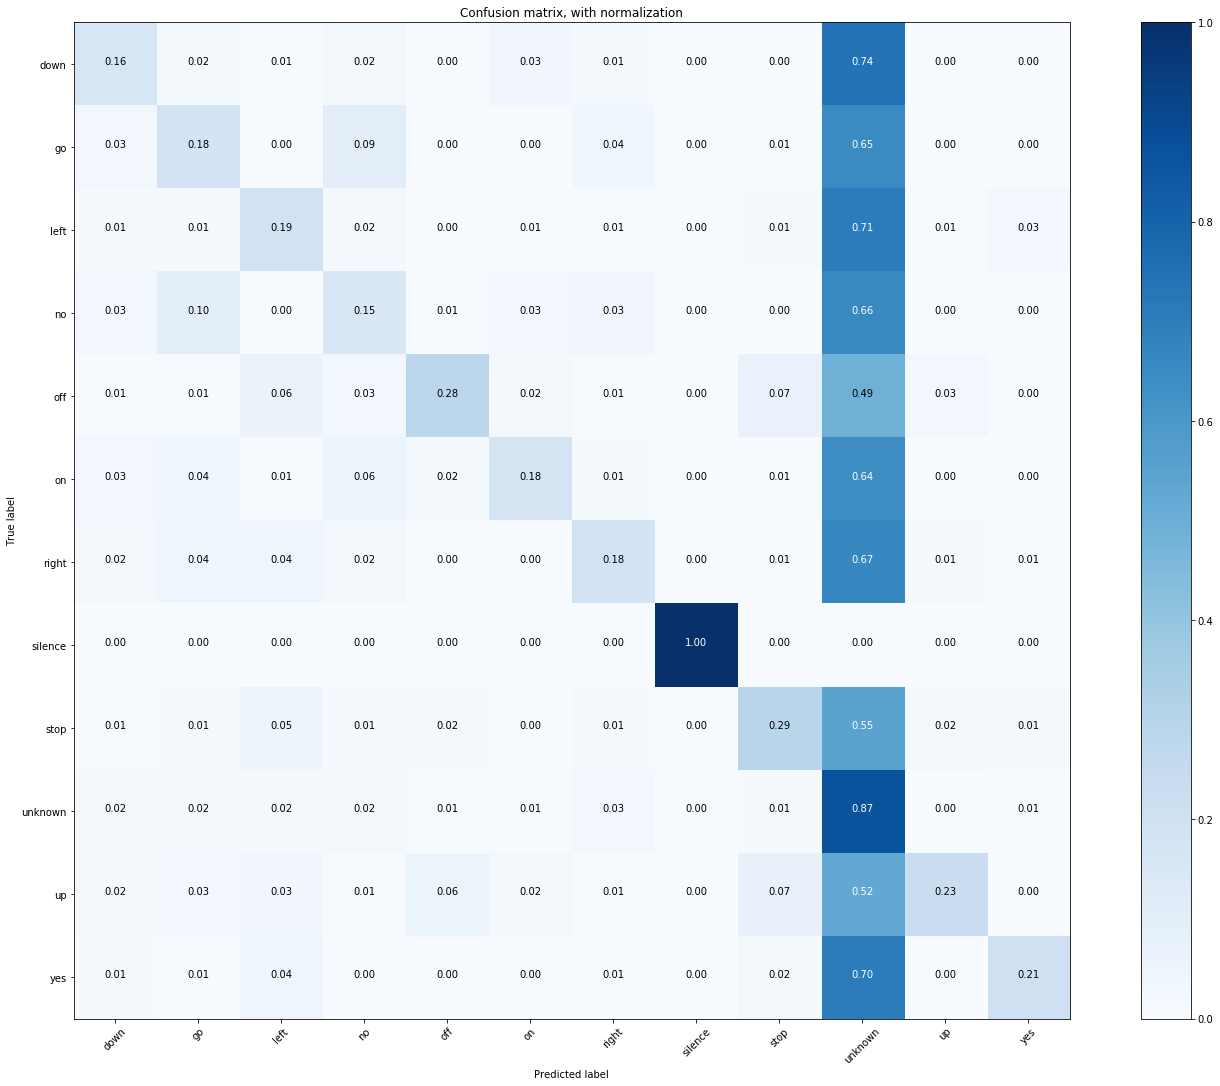

In [20]:
class_names = np.unique(tr_y)
cnf_matrix = confusion_matrix(val_y, pred_yp_knn)
np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names,title='Confusion matrix, with normalization')
plt.show()

In [35]:
csv_predicted = r'test/predicted.csv'
csv_test = r'sample_submission/sample_submission.csv'

In [11]:
df_test = pd.read_csv('test/features_test.csv')
df_test.head(6)
# df_test.shape

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,-338.511154,102.066710,-4.120895,44.694348,-8.756677,21.426348,-8.100844,10.468752,-3.868767,-3.559325,...,0.794399,0.775464,0.673272,16.731777,13.055074,17.163251,14.892364,16.392394,16.374787,60.968969
1,-535.631106,83.632364,-16.210444,34.133921,14.095130,1.835918,7.162974,12.504350,0.784239,7.275567,...,0.770306,0.742213,0.686465,18.163194,16.717341,15.554067,14.996465,15.707725,19.156684,53.804453
2,-413.966024,138.305580,5.987065,20.857039,-46.532399,10.602467,6.662322,-3.738522,-11.604819,2.684391,...,0.669348,0.604849,0.675655,20.253017,15.041317,18.467179,21.230156,21.180709,21.157533,57.844636
3,-443.474559,137.007666,-64.419557,66.847526,-41.027827,26.234735,-8.921399,-5.852228,11.445934,-20.062091,...,0.741117,0.772101,0.812103,15.504441,10.936783,13.178482,14.035638,15.057313,15.218129,57.469010
4,-370.304210,66.242920,-16.146051,37.255873,-9.583757,1.408579,-23.635343,-7.600453,-2.366957,-6.291928,...,0.624082,0.474024,0.533118,16.493523,17.037861,23.057447,21.886767,21.918772,19.781116,59.204809
5,-513.390532,99.965307,22.274840,54.592541,13.359532,12.503541,-27.477801,6.205036,17.716620,-25.775879,...,0.456625,0.493752,0.594417,21.257338,15.950175,19.563778,17.992970,23.346508,20.275910,54.096226


In [12]:
ts_x = np.array(df_test)
ts_mean = np.mean(ts_x, axis=0)
ts_std = np.std(ts_x, axis = 0,dtype=np.float32)
ts_xp = (ts_x - ts_mean[None,:])/ts_std[None,:]

In [13]:
pred_y = knn_class.predict(ts_xp)

In [39]:
pred_df = pd.read_csv(csv_test)
pred_df['label'] = pred_y
pred_df.to_csv(csv_predicted, index= None)

In [1]:
# pd.DataFrame(pred_df)